In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('dataset_marketing_dataviz.csv', sep=",")

In [45]:
df_cleaned = df.copy()
df_cleaned = df_cleaned.dropna()
df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'], errors='coerce')

In [49]:
df_cleaned

,Date,Campagne,Impressions,Clics,Conversions,Coût,Inutile
0,2024-01-01 00:00:00,Email Marketing,26508.0,1417.0,27.0,294.243529,B
1,2024-01-01 01:00:00,TikTok Ads,26969.0,871.0,114.0,263.182209,B
2,2024-01-01 02:00:00,Facebook Ads,42545.0,504.0,107.0,381.800364,D
3,2024-01-01 03:00:00,Email Marketing,41668.0,1674.0,40.0,148.423072,D
4,2024-01-01 04:00:00,Email Marketing,28061.0,774.0,161.0,182.994692,D
...,...,...,...,...,...,...,...
1190,2024-02-19 14:00:00,Email Marketing,38768.0,1341.0,98.0,17.938195,B
1191,2024-02-19 15:00:00,Email Marketing,30426.0,435.0,169.0,411.006408,C
1192,2024-02-19 16:00:00,Facebook Ads,22772.0,824.0,68.0,29.668041,D
1193,2024-02-19 17:00:00,TikTok Ads,43218.0,897.0,197.0,446.057554,A


/var/folders/00/yvlvclbx36q0g4jbpkm4gr_c0000gn/T/ipykernel_33991/2478662222.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Campagne', y='Impressions', data=df_cleaned, estimator='sum', errorbar=None, palette='viridis')


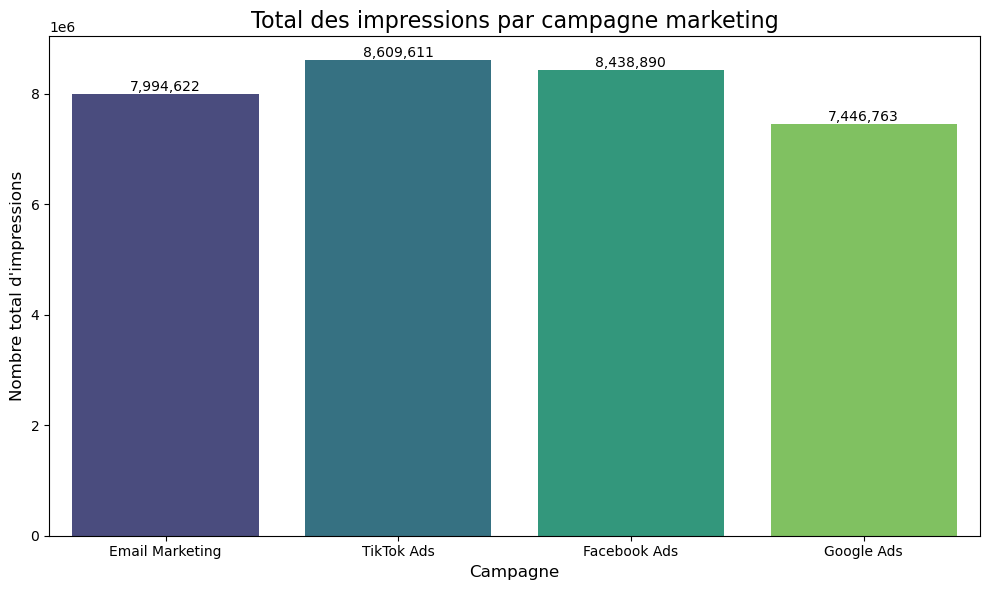

In [75]:
# Création d'un histogramme des impressions par campagne
plt.figure(figsize=(10, 6))

# Utilisation de barplot de Seaborn pour créer l'histogramme
ax = sns.barplot(x='Campagne', y='Impressions', data=df_cleaned, estimator='sum', errorbar=None, palette='viridis')

# Personnalisation du graphique
plt.title('Total des impressions par campagne marketing', fontsize=16)
plt.xlabel('Campagne', fontsize=12)
plt.ylabel('Nombre total d\'impressions', fontsize=12)
plt.xticks(rotation=0)  # Rotation des labels si nécessaire

# Ajout des valeurs sur les barres
for p in ax.patches:
    ax.annotate(f'{int(p.get_height()):,}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=10)

# Amélioration de la mise en page
plt.tight_layout()

# Affichage du graphique
plt.show()

IndexError: index 4 is out of bounds for axis 0 with size 4

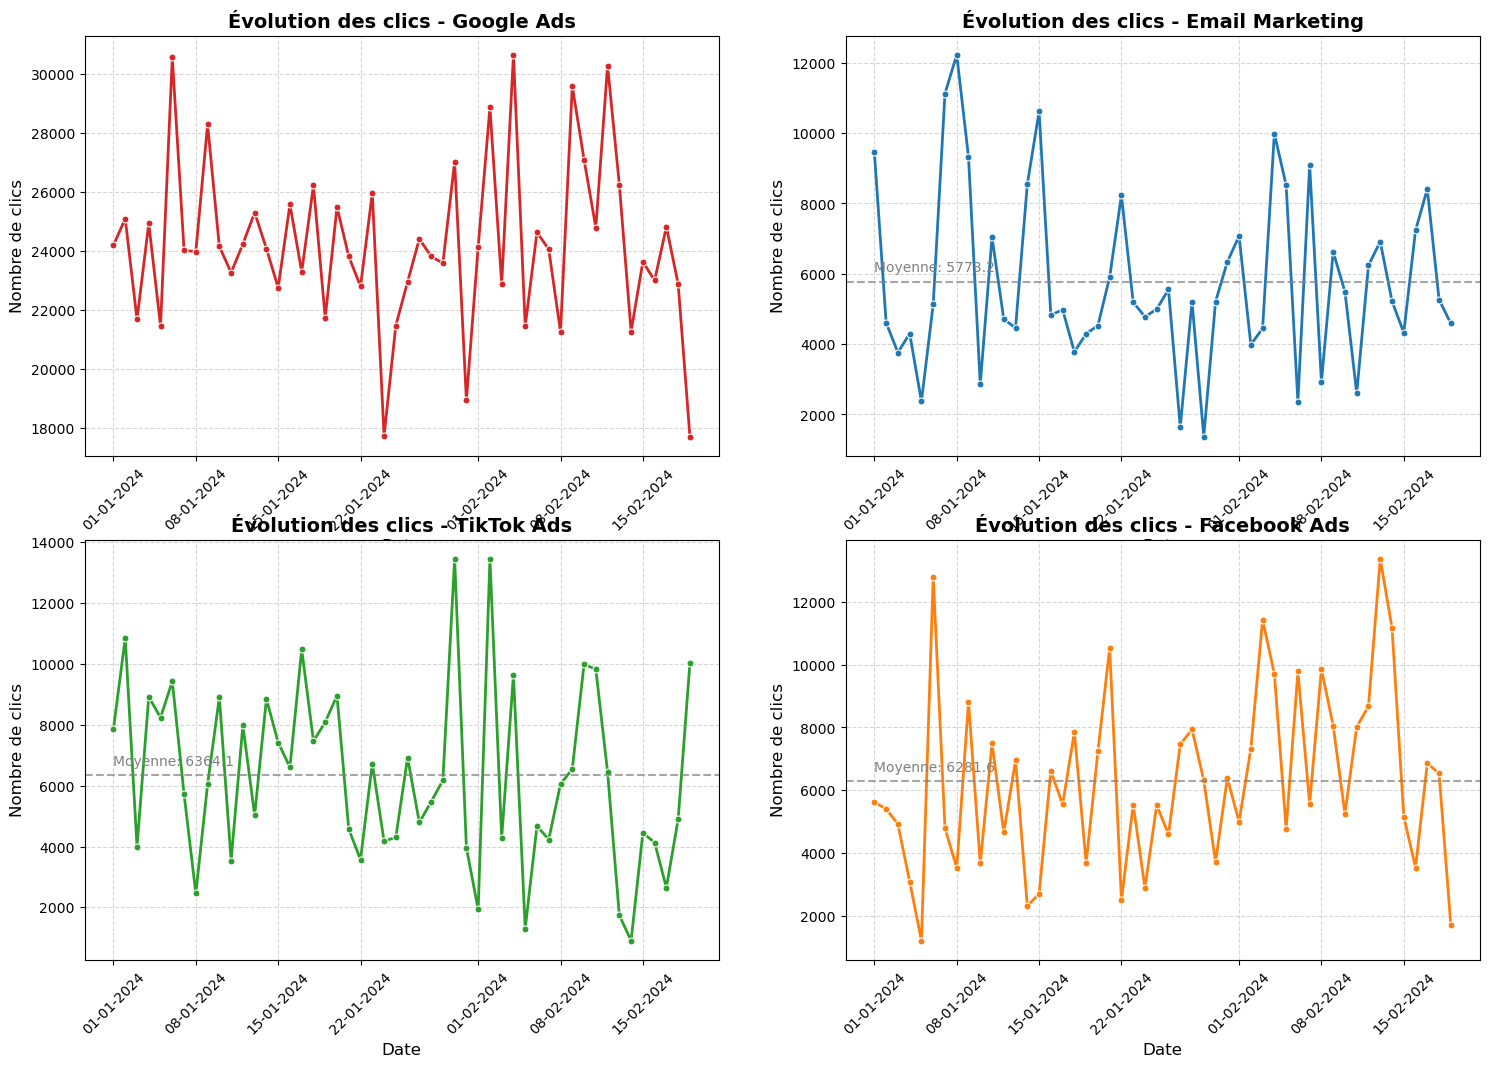

In [95]:
# Préparation des données pour l'évolution temporelle des clics par campagne
# Conversion de la date en datetime si ce n'est pas déjà fait
df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'])

# Création d'une date sans l'heure pour regrouper par jour
df_cleaned['Date_only'] = df_cleaned['Date'].dt.date

# Regroupement par jour et par campagne
df_daily_campaign = df_cleaned.groupby(['Date_only', 'Campagne'])['Clics'].sum().reset_index()
df_daily_campaign['Date_only'] = pd.to_datetime(df_daily_campaign['Date_only'])

# Regroupement par jour pour toutes les campagnes combinées
df_daily_all = df_cleaned.groupby('Date_only')['Clics'].sum().reset_index()
df_daily_all['Date_only'] = pd.to_datetime(df_daily_all['Date_only'])

# Liste des campagnes uniques
campaigns = df_cleaned['Campagne'].unique()

# Création des 4 graphiques (3 campagnes + toutes)
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
axes = axes.flatten()

# Couleurs pour les différentes campagnes
colors = {'Email Marketing': '#1f77b4', 'Facebook Ads': '#ff7f0e', 'TikTok Ads': '#2ca02c', 'Google Ads': '#d62728'}

# Configuration commune pour les axes des abscisses
from matplotlib.dates import DateFormatter, AutoDateLocator

# Fonction pour formater chaque sous-graphique
def format_subplot(ax, title):
    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.set_xlabel('Date', fontsize=12)
    ax.set_ylabel('Nombre de clics', fontsize=12)
    
    # Configuration de l'axe des abscisses
    locator = AutoDateLocator()
    ax.xaxis.set_major_locator(locator)
    ax.xaxis.set_major_formatter(DateFormatter('%d-%m-%Y'))
    ax.tick_params(axis='x', rotation=45)
    
    # Ajout d'une grille
    ax.grid(True, linestyle='--', alpha=0.5)

# Graphique 1: Toutes les campagnes combinées
sns.lineplot(
    data=df_daily_all,
    x='Date_only',
    y='Clics',
    ax=axes[0],
    color=colors['Google Ads'],
    marker='o',
    markersize=5,
    linewidth=2
)
format_subplot(axes[0], 'Évolution des clics - Google Ads')

# Graphiques 2-4: Une campagne par graphique
for i, campaign in enumerate(campaigns, 1):
    # Filtrer les données pour cette campagne spécifique
    campaign_data = df_daily_campaign[df_daily_campaign['Campagne'] == campaign]
    
    # Tracer la ligne pour cette campagne
    sns.lineplot(
        data=campaign_data,
        x='Date_only',
        y='Clics',
        ax=axes[i],
        color=colors[campaign],
        marker='o',
        markersize=5,
        linewidth=2
    )
    format_subplot(axes[i], f'Évolution des clics - {campaign}')
    
    # Ajouter des statistiques
    mean_clicks = campaign_data['Clics'].mean()
    max_clicks = campaign_data['Clics'].max()
    
    axes[i].axhline(y=mean_clicks, color='gray', linestyle='--', alpha=0.7)
    axes[i].text(campaign_data['Date_only'].iloc[0], mean_clicks*1.05, 
                 f'Moyenne: {mean_clicks:.1f}', fontsize=10, color='gray')

# Ajustement de la mise en page
plt.tight_layout()
plt.subplots_adjust(hspace=0.3, wspace=0.2)

# Affichage du graphique
plt.show()

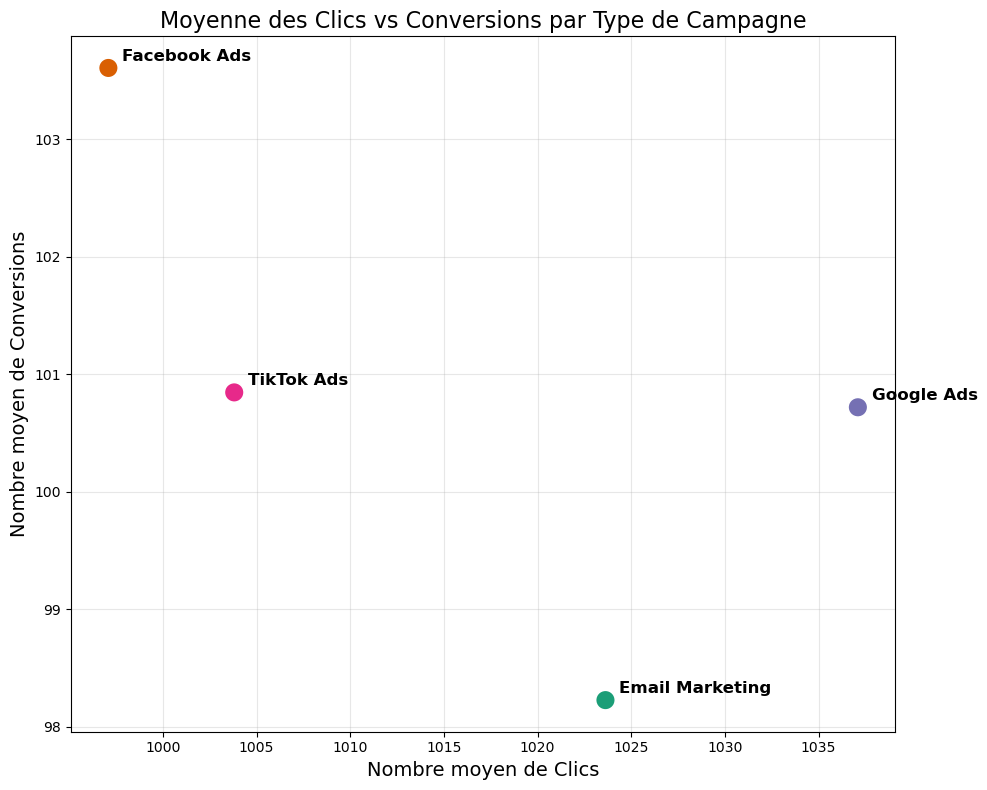

In [87]:
# Création d'un scatterplot ultra simplifié et très lisible
plt.figure(figsize=(10, 8))

# Agréger les données par campagne pour réduire le nombre de points
df_aggregated = df_cleaned.groupby('Campagne').agg({
    'Clics': 'mean',
    'Conversions': 'mean'
}).reset_index()

# Utilisation de scatterplot avec des paramètres optimisés pour la lisibilité
scatter = sns.scatterplot(
    data=df_aggregated,
    x='Clics',
    y='Conversions',
    hue='Campagne',  
    s=200,           # Points plus grands
    alpha=1.0,       # Opacité complète
    palette='Dark2'  # Palette très contrastée
)

# Ajout d'annotations pour chaque point
for i, row in df_aggregated.iterrows():
    plt.annotate(
        row['Campagne'],
        (row['Clics'], row['Conversions']),
        xytext=(10, 5),
        textcoords='offset points',
        fontsize=12,
        fontweight='bold'
    )

# Personnalisation du graphique
plt.title('Moyenne des Clics vs Conversions par Type de Campagne', fontsize=16)
plt.xlabel('Nombre moyen de Clics', fontsize=14)
plt.ylabel('Nombre moyen de Conversions', fontsize=14)

# Suppression de la légende (redondante avec les annotations)
plt.legend().remove()

# Ajout d'une grille claire
plt.grid(True, linestyle='-', alpha=0.3)

# Amélioration de la mise en page
plt.tight_layout()

# Affichage du graphique
plt.show()

/var/folders/00/yvlvclbx36q0g4jbpkm4gr_c0000gn/T/ipykernel_33991/1626562248.py:13: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = pd.pivot_table(


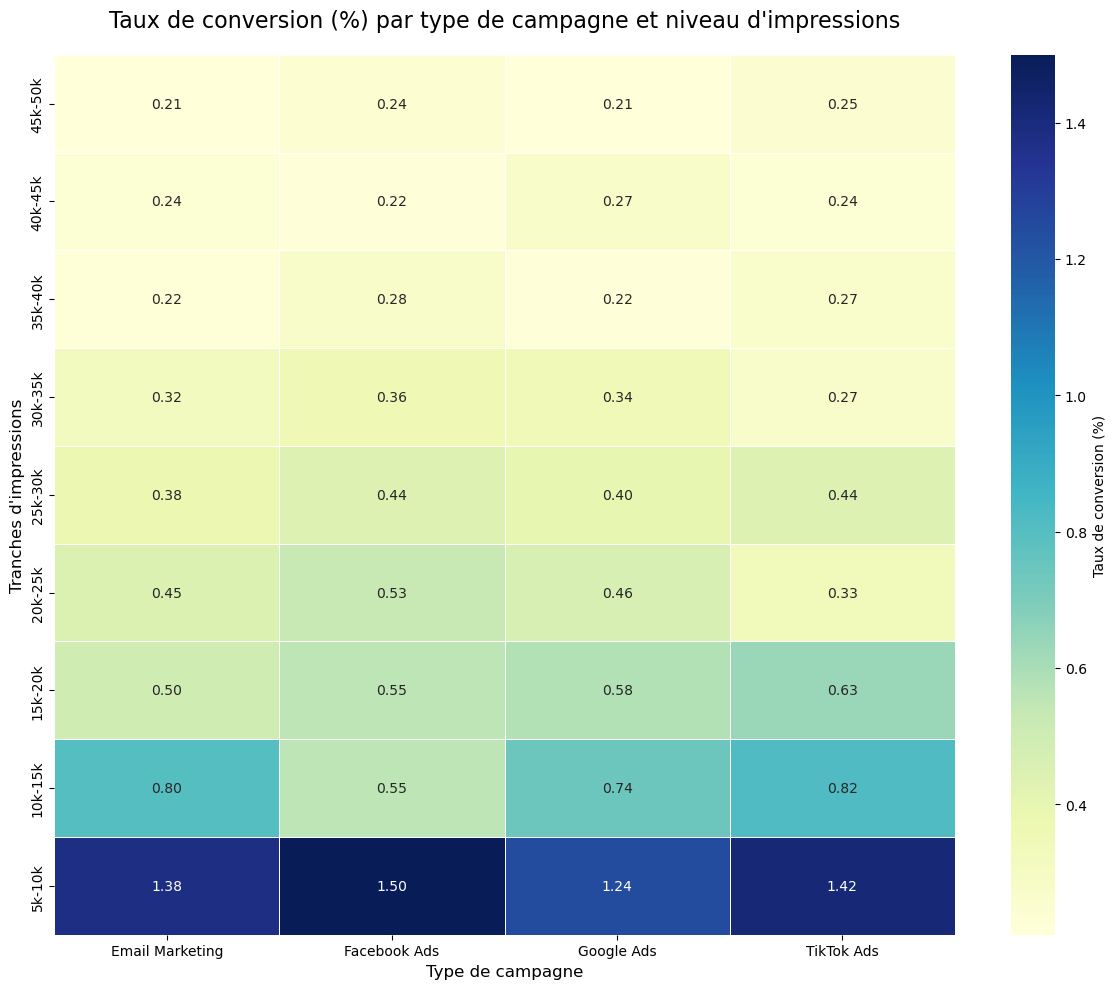

In [111]:
# Définir des tranches d'impressions plus adaptées à la plage 1000-50000
# Créer des tranches de 5000 impressions
tranches = [0, 5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000, 45000, 50000, float('inf')]
labels = ['0-5k', '5k-10k', '10k-15k', '15k-20k', '20k-25k', '25k-30k', '30k-35k', '35k-40k', '40k-45k', '45k-50k', '50k+']

# Appliquer les tranches aux données
df_cleaned['Tranche_Impressions'] = pd.cut(df_cleaned['Impressions'], bins=tranches, labels=labels, right=False)

# Calcul du taux de conversion
df_cleaned['Taux_Conversion'] = (df_cleaned['Conversions'] / df_cleaned['Impressions']) * 100

# Création du pivot table pour la heatmap
heatmap_data = pd.pivot_table(
    df_cleaned,
    values='Taux_Conversion',
    index='Tranche_Impressions',
    columns='Campagne',
    aggfunc='mean',
    fill_value=0
)

# Création de la heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(
    heatmap_data,
    annot=True,              # Afficher les valeurs
    fmt='.2f',               # Format à 2 décimales
    cmap='YlGnBu',           # Palette de couleurs: jaune->vert->bleu pour taux croissants
    linewidths=0.5,          # Largeur des lignes de séparation
    cbar_kws={'label': 'Taux de conversion (%)'}  # Étiquette de la barre de couleur
)

# Ajout des titres et labels
plt.title('Taux de conversion (%) par type de campagne et niveau d\'impressions', fontsize=16, pad=20)
plt.xlabel('Type de campagne', fontsize=12)
plt.ylabel('Tranches d\'impressions', fontsize=12)
plt.tight_layout()

# Inverser l'axe Y pour avoir un ordre croissant (de bas en haut)
plt.gca().invert_yaxis()

# Affichage de la heatmap
plt.show()

